## Scenario

Extract key insights from unstructured text into a structured format (CSV) with rows and columns, including numeric data, then load the CSV formatted data into a data frame and plot a line chart.

## Setup your service details and credentials

In [34]:
import json
import io
import os
import openai

# Load config values
with open(r'config.json') as config_file:
    config_details = json.load(config_file)
    
# Setting up the deployment name
deployment_name = config_details['DEPLOYMENT_NAME']

# This is set to `azure`
openai.api_type = "azure"

# The API key for your Azure OpenAI resource.
openai.api_key = os.getenv("OPENAI_API_KEY")

# The base URL for your Azure OpenAI resource. e.g. "https://<your resource name>.openai.azure.com"
openai.api_base = config_details['OPENAI_API_BASE']

# Currently Chat Completion API have the following versions available: 2023-07-01-preview
openai.api_version = config_details['OPENAI_API_VERSION']

## Call the GPT with the instruction to process the user paragraph and extract key details into CSV format.

In [35]:
response = openai.ChatCompletion.create(
    deployment_id=deployment_name,
    messages=[
    {
      "role": "system",
      "content": "You will be provided with unstructured data, and your task is to parse it into CSV format."
    },
    {
      "role": "user",
      "content": "There are many fruits that were found on the recently discovered planet Goocrux. There are neoskizzles that grow there, which are purple and taste like candy. We found 200 neoskizzles. There were also 300 loheckles, which are a grayish blue fruit and are very tart, a little bit like a lemon. Pounits were about 500 and are a bright green color and are more savory than sweet. There are also 100 loopnovas which are a neon pink flavor and taste like cotton candy. Finally, there are fruits called glowls, which have a very sour and bitter taste which is acidic and caustic, and a pale orange tinge to them. We counted 350 of these."
    }
  ],
  temperature=0,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

## Print the CSV formatted response.

In [36]:
print(response.choices[0].message.content)

fruit, color, taste, quantity
neoskizzles, purple, candy, 200
loheckles, grayish blue, tart, 300
pounits, bright green, savory, 500
loopnovas, neon pink, cotton candy, 100
glowls, pale orange, sour/bitter, 350


# Load the CSV data into a dataset.

In [37]:
import io
import matplotlib.pyplot as plt
import pandas as pd

csv = io.StringIO('\n'.join(response.choices[0].message.content.split('\n')[1:]))
df = pd.read_csv(csv)
print (df)

  neoskizzles         purple          candy   200
0   loheckles   grayish blue           tart   300
1     pounits   bright green         savory   500
2   loopnovas      neon pink   cotton candy   100
3      glowls    pale orange    sour/bitter   350


## Plot the loaded dataset as a line chart.

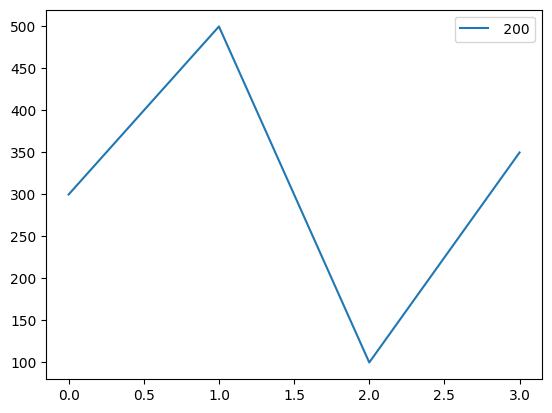

In [38]:
df.plot()
plt.show()